In [127]:
## imports

import time
import pandas as pd
import matplotlib.style as style
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS 

In [7]:
## configs

WA_chat = 'WhatsApp Chat with Urmi-san.txt'
# style.available
style.use('fivethirtyeight')

In [101]:
def read_file(file):
    
    '''Reads Whatsapp text file into a list of strings'''
    x = open(file,'r', encoding = 'utf-8') #Opens the text file into variable x but the variable cannot be explored yet
    y = x.read() #By now it becomes a huge chunk of string that we need to separate line by line
    content = y.splitlines() #The splitline method converts the chunk of string into a list of strings
    
    return content



def prepare_df_and_parse_date_and_time(chatc):
    text_df, error_count, error_list = pd.DataFrame(), 0, list()
    for i in range(len(chatc)):
        print("\n\nProcessing ", i, "of ", len(chatc), "...")
        try:
            x = chatc[i].split(' - ')
            print("x: ",x)
            
            y0, y1 = x[0].split(', '), x[1].split(': ')
            
            y00 = datetime.strptime(y0[0], '%d/%m/%y').date()
            y01 = datetime.strptime(y0[1], '%H:%M').time()

            min =  y01.minute
            if min >= 30:
                if(y01.hour == 23):
                    y01 = y01.replace(00, 00)
                else:
                    y01 = y01.replace(y01.hour + 1, 00)
            else:
                y01 = y01.replace(y01.hour, 00)
            
        except:
            error_count += 1 ## x0 doesn't have required object
            continue ## TODO: Handle this later by appending the new line to the previous line 

        text_df = text_df.append([[y00, y01, y1[0], y1[1]]])

    try:
        col4 = text_df[4]
        text_df.drop([4], axis=1, inplace=True)
    except:
        col4 = None
    text_df.columns = ['Date', 'Time', 'Sender', 'Text']
    text_df = text_df.reset_index(drop=True)
        
    return text_df, error_count, error_list, col4



def total_chat_distribution(text_df):

    contact_list = text_df.Sender.unique().tolist()
    x = text_df.groupby('Sender').count()
    
    no_of_text = list()
    for i in range(len(x)):
        # print(x, f"i: {i}\nx.iloc[1][0]: {x.iloc[1][0]}")
        no_of_text.append(x.iloc[i][0])

    return contact_list, no_of_text



def daily_chat_distribution(text_df):
    
    ## Mon=0, Tue=1, Wed=2, ... , Sun=6
    daily_freq = [0, 0, 0, 0, 0, 0, 0] 
    for index, row in text_df.iterrows():
        day = row['Date'].weekday()
        daily_freq[day] += 1

    return daily_freq



def hourly_chat_distribution(text_df):
    hourly_freq = [0 for i in range(24)] ## 24 0's each for 1 hour
    for index, row in text_df.iterrows():
        hour = row['Time'].hour
        hourly_freq[hour] += 1
    return hourly_freq

In [63]:
len(text_df)

36616

In [97]:
temp = '23:41'
temp = datetime.strptime(temp, '%H:%M').time()

min =  temp.minute
if min >= 30:
    if(temp.hour == 23):
        temp = temp.replace(00, 00)
    else:
        temp = temp.replace(temp.hour + 1, 00)
else:
    temp = temp.replace(temp.hour, 00)
print(temp)

00:00:00


In [91]:
text_df.iloc[36464]

Date         2020-06-24
Time           08:00:00
Sender       Subhroneel
Text      Mamoniiiiiiii
Name: 36464, dtype: object

In [8]:
chat = read_file(WA_chat)
chatc = [x for x in chat]

😘😘😘😘']


Processing  39844 of  40059 ...
x:  ['22/06/20, 23:05', 'Subhroneel: Kalk call korbo']


Processing  39845 of  40059 ...
x:  ['22/06/20, 23:05', 'Subhroneel: Onek bhalobasha toke']


Processing  39846 of  40059 ...
x:  ['22/06/20, 23:05', 'Subhroneel: Ghubplu idli tumi']


Processing  39847 of  40059 ...
x:  ['22/06/20, 23:05', 'Subhroneel: 👻👻👻👻']


Processing  39848 of  40059 ...
x:  ['22/06/20, 23:06', 'Subhroneel: Tata re']


Processing  39849 of  40059 ...
x:  ['22/06/20, 23:06', 'Urmi-san 🤗: 💋']


Processing  39850 of  40059 ...
x:  ['22/06/20, 23:06', 'Subhroneel: ❤️']


Processing  39851 of  40059 ...
x:  ['22/06/20, 23:06', 'Subhroneel: ❤️']


Processing  39852 of  40059 ...
x:  ['22/06/20, 23:06', 'Urmi-san 🤗: Tata']


Processing  39853 of  40059 ...
x:  ['22/06/20, 23:06', 'Subhroneel: 💐💐💐💐💐💐💐💐💐💐💐💐💐💐💐💐']


Processing  39854 of  40059 ...
x:  ['22/06/20, 23:06', "Subhroneel: I'll be fine don't worry"]


Processing  39855 of  40059 ...
x:  ['22/06/20, 23:06', 'Urmi-san

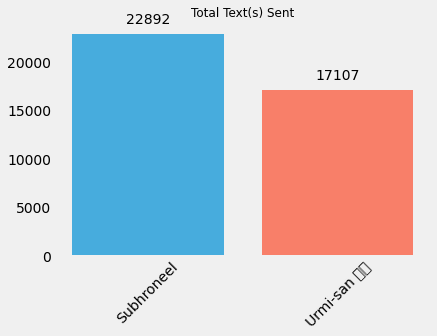

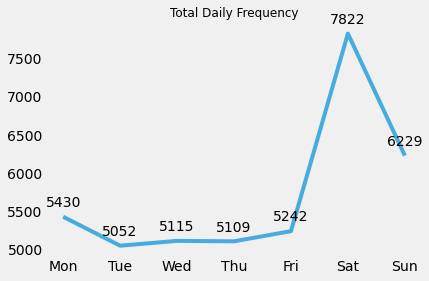

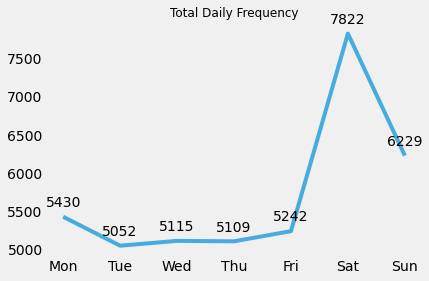

--- 318.2055685520172 seconds elapsed---


In [100]:
## Main 

start_time = time.time()

text_df, error_count, error_list, col4 = prepare_df_and_parse_date_and_time(chatc)
print(f"{error_count} error occured while building df!")
print("--- %s seconds elapsed---" % (time.time() - start_time))

In [126]:
text_df

,Date,Time,Sender,Text
0,2019-07-13,09:00:00,Subhroneel,Bore hoche bole
1,2019-07-13,09:00:00,Subhroneel,😒😒
2,2019-07-13,09:00:00,Subhroneel,Erom hashli?
3,2019-07-13,09:00:00,Urmi-san 🤗,Mom knows you are not bored
4,2019-07-13,10:00:00,Urmi-san 🤗,Ha
...,...,...,...,...
39994,2020-06-26,08:00:00,Subhroneel,Kalk busy chili jani
39995,2020-06-26,08:00:00,Subhroneel,Ajk bikel bela call me
39996,2020-06-26,08:00:00,Subhroneel,❤️❤️
39997,2020-06-26,08:00:00,Subhroneel,Prem korba


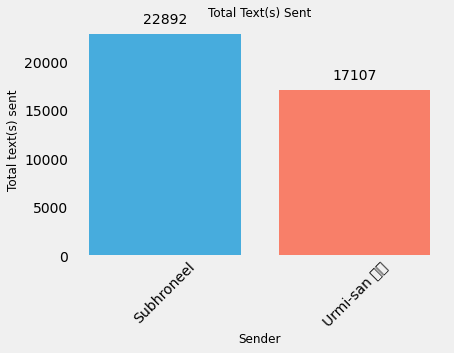

In [125]:
## functions to plot total text sent graph



contact_list, no_of_text = total_chat_distribution(text_df)
# plt.figure(figsize=(20,10))
for i in range(len(contact_list)):
    plt.bar(contact_list[i], no_of_text[i], label=contact_list[i], alpha=0.7)
    plt.annotate(no_of_text[i], # this is the text
                 (contact_list[i],no_of_text[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.grid(False)
plt.ylabel('Total text(s) sent', fontsize=12)
plt.xlabel('Sender', fontsize=12)
plt.xticks(rotation=45)
plt.title('Total Text(s) Sent', fontsize=12)
plt.show()
# print(contact_list, no_of_text)

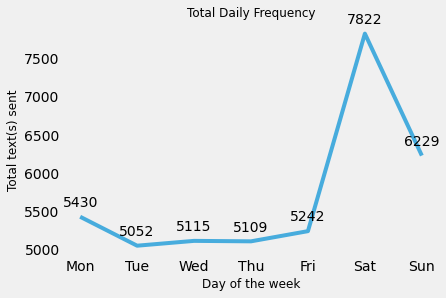

In [124]:
## functions to plot daily chat distribution



daily_freq = daily_chat_distribution(text_df)
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# plt.figure(figsize=(5,5))
plt.grid(False)
plt.title('Total Daily Frequency', fontsize=12)
plt.plot(day, daily_freq, alpha=0.7)
plt.ylabel('Total text(s) sent', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
for i in range(len(daily_freq)):
    plt.annotate(daily_freq[i], # this is the text
                 (i,daily_freq[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.show()

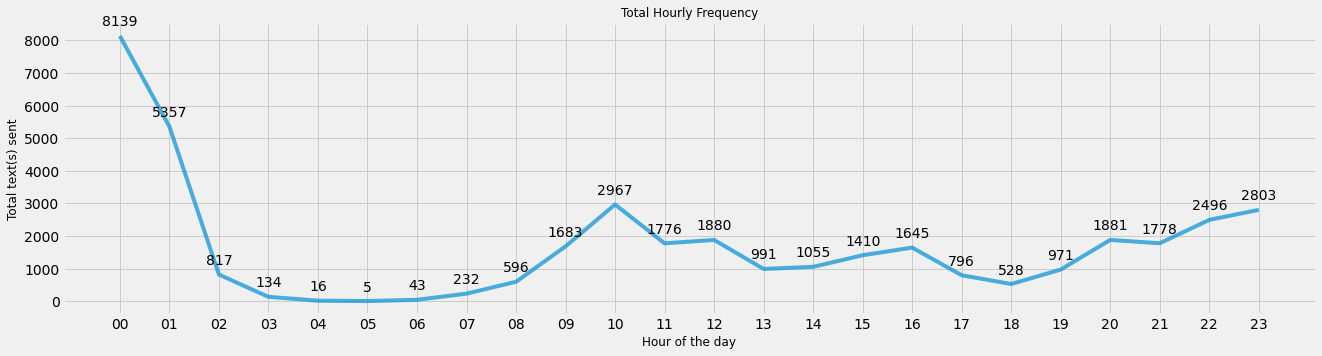

In [122]:
## functions to plot hourly chat distribution



hourly_freq = hourly_chat_distribution(text_df)
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', 
        '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
plt.figure(figsize=(20,5))
# plt.grid(False)
plt.title('Total Hourly Frequency', fontsize=12)
plt.plot(hour, hourly_freq, alpha=0.7)
plt.ylabel('Total text(s) sent', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
for i in range(len(hourly_freq)):
    plt.annotate(hourly_freq[i], # this is the text
                 (i,hourly_freq[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
plt.show()

In [134]:
for idx, row in text_df.iterrows():
    print(row)
    break

Date           2019-07-13
Time             09:00:00
Sender         Subhroneel
Text      Bore hoche bole
Name: 0, dtype: object


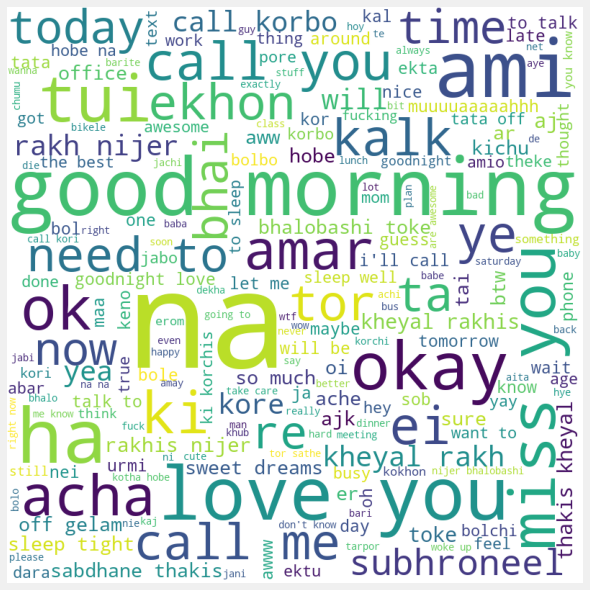

In [140]:
## utility to plot wordcloud

# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
words = '' 
stopwords = set(STOPWORDS) 
stopwords.add('media')
stopwords.add('omitted')
stopwords.add('thi')

# iterate through the csv file 
for idx, row in text_df.iterrows():
      
    # typecaste each val to string 
    text_str = row[3] 
  
    # split the value 
    tokens = text_str.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [212]:
## Ideas to implement:
## 1. Avg. text length
## 2. Hourly Frequency --Done
## 3. Daily Freq + hourly freq by sender (k koto text kore for each day and hour)
## 4. Attractive plots
## 5. Most 'babes' used
## 6. Wordcloud --Done
## 7.

In [50]:
# ## def prepare_df_and_parse_date_and_time(chatc):
# text_df, error_count, error_list = pd.DataFrame(), 0, list()
# for i in range(len(chatc)):
#     print("\n\nProcessing ", i, "of ", len(chatc), "...")
#     try:
#         x = chatc[i].split(' - ')
#         print("x: ",x)
        
#         y0, y1 = x[0].split(', '), x[1].split(': ')
        
#         y00 = datetime.strptime(y0[0], '%d/%m/%y').date()
#         y01 = datetime.strptime(y0[1], '%H:%M').time()

#         min =  y01.minute
#         if min >= 30:
#             y01 = y01.replace(y01.hour + 1, 00)
#         else:
#             y01 = y01.replace(y01.hour, 00)
        
#     except e:
#         error_count += 1 ## x0 doesn't have required object
#         continue ## TODO: Handle this later by appending the new line to the previous line 

#     text_df = text_df.append([[y00, y01, y1[0], y1[1]]])

# try:
#     col4 = text_df[4]
#     text_df.drop([4], axis=1, inplace=True)
# except:
#     col4 = None
# text_df.columns = ['Date', 'Time', 'Sender', 'Text']
# text_df.reset_index(drop=True, inplace=True)
    
# # return text_df, error_count, error_list, col4


In [114]:
## Code fragment to plot total text distribution



# for i in range(len(contact_list)):
#     plt.bar(contact_list[i], no_of_text[i], label=contact_list[i], alpha=0.7)
#     plt.annotate(no_of_text[i], # this is the text
#                  (contact_list[i],no_of_text[i]), # this is the point to label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') 

# plt.grid(False)
# plt.xticks(rotation=45)
# plt.title('Total Text(s) Sent', fontsize=12)

In [189]:
## Code fragment to plot daily distribution



# def daily_chat_distribution(text_df):
    
#     ## Mon=0, Tue=1, Wed=2, ... , Sun=6
#     daily_freq = [0, 0, 0, 0, 0, 0, 0] 
#     for index, row in text_df.iterrows():
#         day = row['Date'].weekday()
#         daily_freq[day] += 1

#     return daily_freq

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# l1 = ax.plot(x1,y,'ys-') # solid line with yellow colour and square marker
# l2 = ax.plot(x2,y,'go--') # dash line with green colour and circle marker
# ax.legend(labels = ('tv', 'Smartphone'), loc = 'lower right') # legend placed at lower right
# ax.set_title("Advertisement effect on sales")
# ax.set_xlabel('medium')
# ax.set_ylabel('sales')
# plt.show()

In [30]:
# # text_df.iloc[0][0].astype('datetime64[ns]')
# for i in range(len(text_df)):
#     try:
#         x = datetime.datetime.strptime(text_df.iloc[i][0], '%d/%m/%y')
#         x = x.date()
#         print(f"i: {i} x: {x}")
#         print("text_df value before: ", text_df.iloc[i][0])
#         text_df.iloc[i][0] = x
#         print("text_df value after: ", text_df.iloc[i][0])
#         print("\n\n")
#     except ValueError:
#         print("Dropping following row from df:\n", text_df.iloc[i])
#         text_df.drop([i], inplace=True)
#         # continue
#     except TypeError:
#         print("skip!", i)
#         continue

In [31]:
# import datetime
# # Remove elements that are not date
# len(chat) #40059

# for i in range(len(chat)):
#   try:
#     datetime.datetime.strptime(chat[i].split(',')[0], '%d/%m/%Y') #Converts string date into a date object
#   except ValueError: #Returns an error if the string is not a datetime object
#     chat[i-1] = chat[i-1] + ' ' + chat[i] #Appends the next line to the previous line
#     chat[i] = "NA" #Replace the unwanted text element with 'NA'
    
# #Handle more than double-line texting
# for i in range(len(chat)):
#   if chat[i].split(' ')[0] == 'NA':
#     chat[i] = 'NA'
    
# while True:
#     try:
#         chat.remove("NA")
#     except ValueError:
#         break
        
# len(chat) #33425